<a href="https://colab.research.google.com/github/rujeetjahagirdar/DM_Assignment1_Classification-/blob/master/playground3_BASIC_3Layer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import torch
from torchvision import datasets,transforms,io
from torch import utils
from collections import Counter

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Loading Images:**

First step of any Neural Network/Machine Learning problem is the loading the input data. Here in this cell we will load the given input images. The problem set gives us different types of images of Bikes, Airplanes, Schooners. And we have to create a neural network model that will classify a given image in to these three categories. 
Here given images are in different shapes so while loading these images we will transform them into 512x512 pixels size and then convert them into Tensors.
Tensor is a numpy array like data structure which is developed for handling arrays of large size for example image arrays.

Next, we will split our input dataset into three sub datasets i.e. training dataset, validation dataset and testing dataset. Here we have kept around 20% of total data aside for testing and remaining 80% data we will use for traning and validation.

We will convert these three datasets into respective dataloader object. Dataloader object will be used for iterating over the these data and divide them in batches.


331

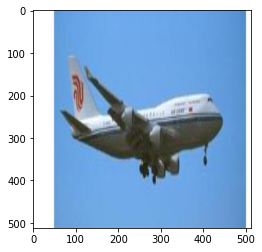

In [ ]:
transform = transforms.Compose([transforms.Resize((512,512)),transforms.ToTensor()])
dataset = datasets.ImageFolder('/content/drive/MyDrive/Colab Notebooks/archive/caltech101_classification/',transform=transform)
trainData,validationData,testData = utils.data.random_split(dataset,[930,400,331],generator=torch.Generator().manual_seed(42))
plt.imshow(trainData[230][0].permute(1,2,0))
trainDataLoader = torch.utils.data.DataLoader(trainData, batch_size=32, shuffle=True)
validationDataLoder = torch.utils.data.DataLoader(validationData, batch_size=32, shuffle=True)
testDataLoader = torch.utils.data.DataLoader(testData, batch_size=32, shuffle=True)
len(validationDataLoder.dataset)

In [ ]:
validationDataLoder

In [ ]:
# class CNN2(torch.nn.Module):

#     def __init__(self):
#         super(CNN2, self).__init__()
#         ###############################
#         # Original Input image: (224,224,3)
#         # Conv : (224,224,16)
#         # Pool: (112,112,16)
#         self.layer1 = torch.nn.Sequential(
#             torch.nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1),
#             torch.nn.ReLU(),
#             torch.nn.MaxPool2d(kernel_size=2, stride=2),
#         )
#         ########################################
#         # Input Image: (112,112,16)
#         # Conv: (112,112,64)
#         # Pool: (56,56,64)
#         self.layer2 = torch.nn.Sequential(
#             torch.nn.Conv2d(16, 64, kernel_size=3, stride=1, padding=1),
#             torch.nn.ReLU(),
#             torch.nn.MaxPool2d(kernel_size=2, stride=2),
#         )
#         ############################################
#         # FC 28*28*128 -> 625
#         self.fc1 = torch.nn.Linear(128*128 * 64, 3, bias=True) # size of image input to this layer * 128
#         torch.nn.init.xavier_uniform_(self.fc1.weight)
#         self.layer4 = torch.nn.Sequential(
#             self.fc1,
#             torch.nn.ReLU()
#         )

#     def forward(self, x):
#         out = self.layer1(x)
#         out = self.layer2(out)
#         out = out.view(out.size(0), -1)   # Flatten them for FC
#         out = self.fc1(out)
#         return out


# #instantiate CNN model
# model = CNN2()
# model

**Creating CNN Architectures:**

In this code block we have defined the architecture of our Convolutional Networks. We have created 3 convolutional layers and 2 fully connected layers.
Each convolutional layer will have a pooling layer attached after it. This block of code is the essence of our CNN. Brief information about these layers is as mentioned below.</br>
**Conv Layer:**  In this layer number of kernels of size specified by user will be used to convolve on the given input image matrix. Kernel is basically a small matrix which will be used to learn some specific feature in the image. For example, one kernel can be used to determine the vertical line in the image, another kernal can used to determine a curve in the image.</br>So during training phase of the model, these kernal are learned and used later in testing phase to determine that feature in the test image.</br>
Here the first layer, we have used a 16 kernels of size 3, stride=1 and padding=1. which will have the original image as an input and will output an image of dimensions 512x512x16.
</br>**ReLU:**</br>
</br>**Pooling Layer:** As the size of the channels increases the weights associated with them also increases which leads to performance degredation. So, to solve this problem pooling layer is used. Pooling layer is used to reduce the size of input image. It will use a pooling technique to reduce the size image. Max pooling is the type of pooling which will convolve an nxn kernel on the image and will select the maximum element from the window.
It will output an image of dimensions
<br>W2=(W1−F)/S+1
<br>H2=(H1−F)/S+1
<br>D2=D1<br>
where W2, H2 are the dimensions of the output image and W1,H1 are the dimensions of input image and F is size of the pooling kernel and S is the stride.
</br><br>
In CNN multiple conv layer and pool layers will be chained together, so output of the previous layer will be the input of next layer.
<br><br>
***Fully connected Layer:***

In [ ]:
class CNN3(torch.nn.Module):

    def __init__(self):
        super(CNN3, self).__init__()
        ###############################
        # Original Input image: (512,512,3)
        # Conv : (512,512,16)
        # Pool: (256,256,16)
        self.layer1 = torch.nn.Sequential(
            torch.nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2),
        )
        ########################################
        # Input Image: (256,256,16)
        # Conv: (256,256,64)
        # Pool: (128,128,64)
        self.layer2 = torch.nn.Sequential(
            torch.nn.Conv2d(16, 64, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2),
        )
        ###############################
        # Input image: (128,128,64)
        # Conv : (128,128,128)
        # Pool: (64,64,128)
        self.layer3 = torch.nn.Sequential(
            torch.nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2),
        )
        ############################################
        # FC 28*28*128 -> 625
        self.fc1 = torch.nn.Linear(64*64 * 128, 256, bias=True) # size of image input to this layer * 128
        torch.nn.init.xavier_uniform_(self.fc1.weight)
        self.layer4 = torch.nn.Sequential(
            self.fc1,
            torch.nn.ReLU()
        )
        ############################################
        # FC 256 -> 3 Classes
        self.fc2 = torch.nn.Linear(256, 3, bias=True) # size of image input to this layer * 128
        torch.nn.init.xavier_uniform_(self.fc2.weight)
        self.layer5 = torch.nn.Sequential(
            self.fc2,
            torch.nn.ReLU()
        )

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = out.view(out.size(0), -1)   # Flatten them for FC
        out = self.fc1(out)
        out = self.fc2(out)
        return out


#instantiate CNN model
model3 = CNN3()
model3
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model3.to(device)

CNN3(
  (layer1): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(16, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer3): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc1): Linear(in_features=524288, out_features=256, bias=True)
  (layer4): Sequential(
    (0): Linear(in_features=524288, out_features=256, bias=True)
    (1): ReLU()
  )
  (fc2): Linear(in_features=256, out_features=3, bias=True)
  (layer5): Sequential(
    (0): Linear(in_features=256, out_features=3, bias=True)
    (1): ReLU()
  )
)

**Training CNN model:**<br>
Cross Entropy Loss:
<br>Optimizer:
<br>Here we will use 3 epochos. Epoch is bascially number of repetations. So here the model will be trained three times on input data. In each pass the algorithm will do a forward and backward pass and update the weights by using gradients.


In [ ]:
import torch.optim as optim

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model3.parameters(), lr=0.001, momentum=0.9)

no_of_epochos = 3
for epoch in range(no_of_epochos):
    running_loss = 0.0
    for i,data in enumerate(trainDataLoader):
      if(i%10==0):
        print("i=",i)
      inputData , lable = data[0].to(device), data[1].to(device)
      optimizer.zero_grad()
      output = model3(inputData)
      loss = criterion(output,lable)
      loss.backward()
      optimizer.step()
      running_loss = running_loss+loss.item()
      if i % 5 == 0:    # print every 2000 mini-batches
        print('Epoch={} Batch={} Loss= {}'.format(epoch + 1, i + 1, running_loss / 2000))
        running_loss = 0.0
print("####Finished Training######")

i= 0
Epoch=1 Batch=1 Loss= 0.0005608586668968201
Epoch=1 Batch=6 Loss= 0.0023683254420757294
i= 10
Epoch=1 Batch=11 Loss= 0.0016238464415073396
Epoch=1 Batch=16 Loss= 0.001425756111741066
i= 20
Epoch=1 Batch=21 Loss= 0.0013356025367975235
Epoch=1 Batch=26 Loss= 0.0011488624662160873
i= 0
Epoch=2 Batch=1 Loss= 0.00016711129248142242
Epoch=2 Batch=6 Loss= 0.0014732759147882463
i= 10
Epoch=2 Batch=11 Loss= 0.0011275709718465805
Epoch=2 Batch=16 Loss= 0.0012469656765460968
i= 20
Epoch=2 Batch=21 Loss= 0.0007796030044555664
Epoch=2 Batch=26 Loss= 0.0008300191015005112
i= 0
Epoch=3 Batch=1 Loss= 0.0001217271313071251
Epoch=3 Batch=6 Loss= 0.0006930047161877156
i= 10
Epoch=3 Batch=11 Loss= 0.0006932705417275429
Epoch=3 Batch=16 Loss= 0.0005407363809645176
i= 20
Epoch=3 Batch=21 Loss= 0.0006430460959672928
Epoch=3 Batch=26 Loss= 0.0005544955879449845
####Finished Training######


**Testing model:**<br>
In this block we will test our model on validation and test dataset.
<br>
First we will move our input data to GPU and then use our CNN model to predict the class of the images. For each image we will calculate loss and correct predictions.
<br>
These same steps will be used for test dataset as well.
<br><br>
By using this CNN model with 3 conv layer and 2 fully connected layers we got 93% accuracy on validation dataset and **92%** accuracy on test dataset.

In [ ]:
valcorrect = 0
valtotal = 0
with torch.no_grad():
    for data in validationDataLoder:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = model3(images)
        _, predicted = torch.max(outputs.data, 1)
        valtotal = valtotal + labels.size(0)
        valcorrect = valcorrect + (predicted == labels).sum().item()

print('Accuracy of the network on validation images: %d %%' % (
    100 * valcorrect / valtotal))

testcorrect = 0
testtotal = 0
with torch.no_grad():
    for data in testDataLoader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = model3(images)
        _, predicted = torch.max(outputs.data, 1)
        testtotal = testtotal + labels.size(0)
        testcorrect = testcorrect + (predicted == labels).sum().item()

print('Accuracy of the network on test images: %d %%' % (
    100 * testcorrect / testtotal))

Accuracy of the network on validation images: 93 %
Accuracy of the network on test images: 92 %


**References:**<br>


1.   [CS231n: Deep Learning for Computer Vision - Stanford - Spring 2022](https://cs231n.github.io/convolutional-networks/)
2.   [PyTorch Tutorials](https://pytorch.org/tutorials/index.html)

3.   [PyTorch Conv2D Explained with Examples](https://machinelearningknowledge.ai/pytorch-conv2d-explained-with-examples/)




Actual:Motorbikes Predicted:Motorbikes


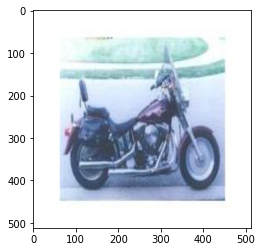

In [ ]:
print('Actual:{} Predicted:{}'.format(testData.dataset.classes[labels[7]],testData.dataset.classes[predicted[7]]))
plt.imshow(images[7].cpu().permute(1,2,0))

In [ ]:
# for i in testDataLoader:
#   print('Images:{} --> Lables:{}'.format(len(i[0]),len(i[1])))